# Overview

This is the 3rd algorithm on my list. I am going to build this model on previous dataset focusing on `cow` as usual.

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder


# Data preparation
### Import

In [2]:
def wrangle(path, animal):
    df = pd.read_csv(path)
    
    # subsetting our dataset base on the animal of intrest
    df = df[df['Animal'] == animal]
    return df

In [3]:
# call to my function to make use of it
df = wrangle('datasets/animal_disease_dataset.csv','cow')
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
11,cow,11,103.9,depression,painless lumps,loss of appetite,lumpy virus
19,cow,14,102.7,shortness of breath,sweats,chills,anthrax
20,cow,1,103.7,depression,loss of appetite,painless lumps,lumpy virus


From previous notebooks I have shown you that this dataset is well cleaned and ready to be used to build different ML model. From this point I am not going to explore the dataset again but I will jump direct to `Data splitting` section 

### Data Split

The data split strategy will be the same as in previous notebooks and I will transform categorical Data at the same time

In [108]:
# Feature matrix X

X = df[df.columns[1:6]]
X.head()

,Age,Temperature,Symptom 1,Symptom 2,Symptom 3
0,3,103.1,depression,painless lumps,loss of appetite
3,14,100.3,loss of appetite,swelling in limb,crackling sound
11,11,103.9,depression,painless lumps,loss of appetite
19,14,102.7,shortness of breath,sweats,chills
20,1,103.7,depression,loss of appetite,painless lumps


In [109]:
# target vector y

y =df['Disease']
y

0             pneumonia
3              blackleg
11          lumpy virus
19              anthrax
20          lumpy virus
              ...      
43759    foot and mouth
43760       lumpy virus
43768       lumpy virus
43770         pneumonia
43776          blackleg
Name: Disease, Length: 11254, dtype: object

In [110]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42)


### Model Building


In [132]:
# model building 
model = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier()
)


# model fitting
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                                mapping=[{'col': 'Symptom 1',
                                          'data_type': dtype('O'),
                                          'mapping': crackling sound             1
depression                  2
swelling in abdomen         3
difficulty walking          4
chest discomfort            5
painless lumps              6
lameness                    7
loss of appetite            8
sweats                      9
sores on mouth             10
swelling in neck           11
fatigue                    12
blisters on gums           13
sores on tongue            14
swelling...
shortness of breath         7
swelling in muscle          8
chest discomfort            9
sores on mouth             10
painless lumps             11
sores on gums              12
difficulty walking         13
swelling in limb           14
sweats                     15
sores on hooves            16
swelling in neck           17
blisters on mouth          18
blisters on gums           19
blisters on tongue         20
blisters on hooves         21
sores on tongue            22
swelling in abdomen        23
swelling in extremities    24
NaN                        -2
dtype: int64}])),
                ('randomforestclassifier', RandomForestClassifier())])

In [133]:
# making prediction
predict_1 = model.predict(X_test)

In [134]:
#### Model Evaluation
print('Train accuracy: ', model.score(X_train,y_train).round(2))
print('Test accuracy: ', accuracy_score(predict_1,y_test).round(2))


Train accuracy:  0.94
Test accuracy:  0.77


#### Hyper Parameter Tuning

I am going to explore my model what defout values it is using up to this point.

In [139]:
estmators = model.named_steps['randomforestclassifier'].get_params()['n_estimators']
depth = model.named_steps['randomforestclassifier'].get_params()['max_depth']
splits = model.named_steps['randomforestclassifier'].get_params()['min_samples_split']
features = model.named_steps['randomforestclassifier'].get_params()['max_features']

print("n_estmators: ",estmators)
print("Max_depth: ",depth)
print("min_samples_split: ",splits)
print("max_features: ",features)

n_estmators:  100
Max_depth:  None
min_samples_split:  2
max_features:  sqrt


Model perfotmance with different parameter values to increase it's performance.
`n_estimators`,`max_depth` and `min_samples_split` 

In [47]:
# let create a for loop to generate all those accuracy score
def hyper_pram_tun(par_name,interval):   
   # lett create 2 lists to store our trainning and testing scores 
    trainning_acc = []
    test_acc = []
    for d in interval:
         rf_model = RandomForestClassifier(random_state=42)
         setattr(rf_model, par_name, d)
        
        # creating our modified pipeline
         modified_model = make_pipeline(
            OrdinalEncoder(),
            rf_model
         )
        
        # let fit our model
         modified_model.fit(X_train,y_train)
        
        # accuracy calculations
         trainning_acc.append(modified_model.score(X_train,y_train))
         test_acc.append(modified_model.score(X_test,y_test))
        
    # dictionary of lists
    scores = {}
    scores['trainning'] = trainning_acc
    scores['testing'] = test_acc
    
    return scores
   

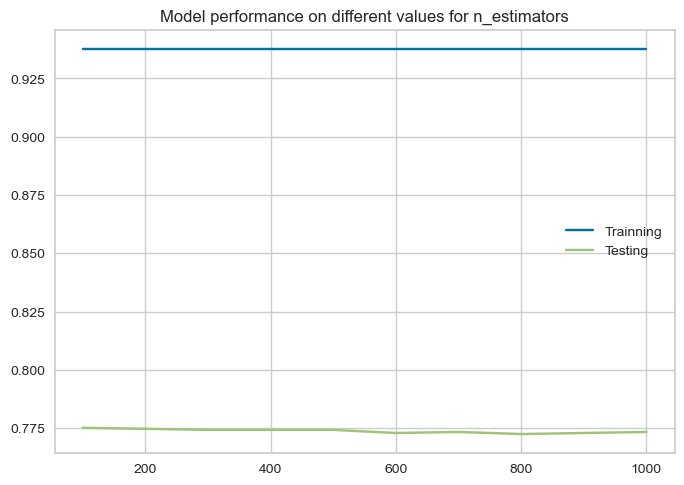

In [39]:
# n_estimators tunning
looper = range(100,1100,100)
scores = hyper_pram_tun('n_estimators',looper)
plt.plot(looper,scores['trainning'],label='Trainning')
plt.plot(looper,scores['testing'],label='Testing')
plt.title('Model performance on different values for n_estimators')
plt.legend();

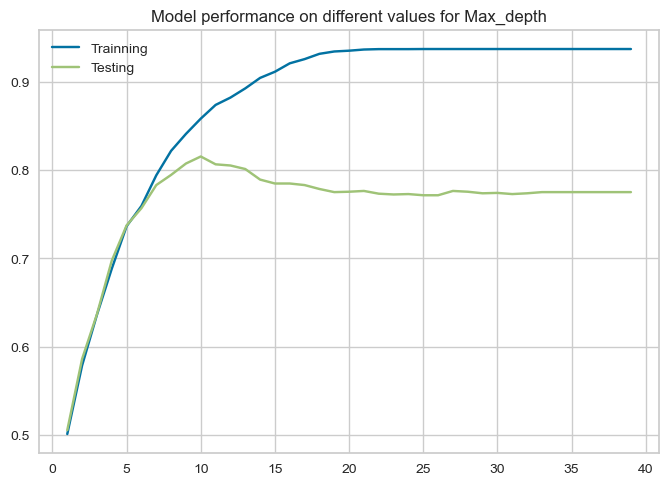

In [51]:
# max_depth tunning
looper = range(1,40)
scores = hyper_pram_tun('max_depth',looper)
plt.plot(looper,scores['trainning'],label='Trainning')
plt.plot(looper,scores['testing'],label='Testing')
plt.title('Model performance on different values for Max_depth')
plt.legend();

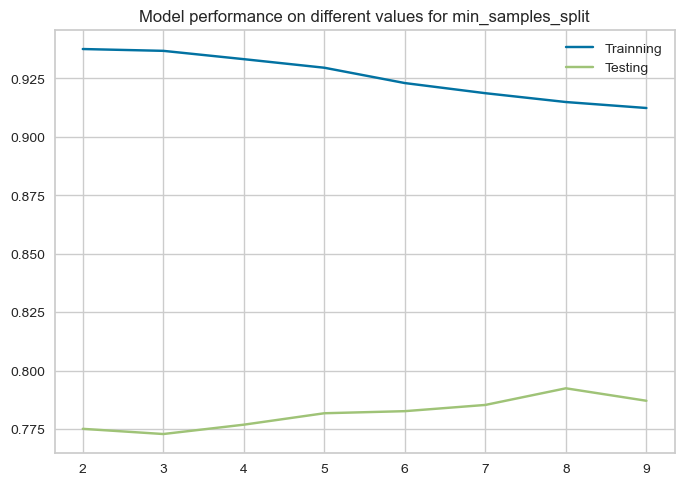

In [140]:
# min_samples_split tunning
looper = range(2,10)
scores = hyper_pram_tun('min_samples_split',looper)
plt.plot(looper,scores['trainning'],label='Trainning')
plt.plot(looper,scores['testing'],label='Testing')
plt.title('Model performance on different values for min_samples_split')
plt.legend();

##### Model with parameters 

In [135]:
final_model = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_split=2, random_state=42)
)

final_model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                                mapping=[{'col': 'Symptom 1',
                                          'data_type': dtype('O'),
                                          'mapping': crackling sound             1
depression                  2
swelling in abdomen         3
difficulty walking          4
chest discomfort            5
painless lumps              6
lameness                    7
loss of appetite            8
sweats                      9
sores on mouth             10
swelling in neck           11
fatigue                    12
blisters on gums           13
sores on tongue            14
swelling...
chest discomfort            9
sores on mouth             10
painless lumps             11
sores on gums              12
difficulty walking         13
swelling in limb           14
sweats                     15
sores on hooves            16
swelling in neck           17
blisters on mouth          18
blisters on gums           19
blisters on tongue         20
blisters on hooves         21
sores on tongue            22
swelling in abdomen        23
swelling in extremities    24
NaN                        -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [136]:
print('Trainning score: ',final_model.score(X_train,y_train).round(2))
print('Test score: ', final_model.score(X_test,y_test).round(2))


Trainning score:  0.86
Test score:  0.82


#### Model Testing 

In [137]:
def transf(Age,Temperature,Symptom1,Symptom2,Symptom3):
    y =pd.DataFrame([{
    'Age':Age,
    'Temperature':Temperature,
    'Symptom 1':Symptom1,
    'Symptom 2':Symptom2,
    'Symptom 3':Symptom3}])
    return y

result = final_model.predict(transf(3,101.4,'shortness of breath','sweats','chills'))[0]
print('Predicted disease:',result)

Predicted disease: anthrax


#### Additional exploration
Let's try reducing features to increase the performance

In [120]:
f_import = pd.Series(final_model.named_steps['randomforestclassifier'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
f_import

Symptom 1      0.363465
Symptom 3      0.327872
Symptom 2      0.285839
Temperature    0.013593
Age            0.009231
dtype: float64

In [127]:
# lets drop features lest than 20%
Xn = X.drop(['Temperature','Age'], axis=1)
Xn_train, Xn_test,yn_train,yn_test = train_test_split(Xn,y,test_size=.2, random_state=42)

In [128]:
final_model1 = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_split=2, random_state=42)
)

final_model1.fit(Xn_train,yn_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                                mapping=[{'col': 'Symptom 1',
                                          'data_type': dtype('O'),
                                          'mapping': crackling sound             1
depression                  2
swelling in abdomen         3
difficulty walking          4
chest discomfort            5
painless lumps              6
lameness                    7
loss of appetite            8
sweats                      9
sores on mouth             10
swelling in neck           11
fatigue                    12
blisters on gums           13
sores on tongue            14
swelling...
chest discomfort            9
sores on mouth             10
painless lumps             11
sores on gums              12
difficulty walking         13
swelling in limb           14
sweats                     15
sores on hooves            16
swelling in neck           17
blisters on mouth          18
blisters on gums           19
blisters on tongue         20
blisters on hooves         21
sores on tongue            22
swelling in abdomen        23
swelling in extremities    24
NaN                        -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [129]:
print('Trainning score: ',final_model1.score(Xn_train,yn_train).round(2))
print('Test score: ', final_model1.score(Xn_test,yn_test).round(2))


Trainning score:  0.83
Test score:  0.84


In [131]:
def transf(Symptom1,Symptom2,Symptom3):
    y =pd.DataFrame([{
    'Symptom 1':Symptom1,
    'Symptom 2':Symptom2,
    'Symptom 3':Symptom3}])
    return y

result = final_model1.predict(transf('shortness of breath','sweats','chills'))[0]
print('Predicted disease:',result)

Predicted disease: anthrax
